In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set() 

import pandas as pd
import numpy as np
import sys, os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from utils import *
from data_generating_funcs import *

In [8]:
np.arange(1, 120, 20)

array([  1,  21,  41,  61,  81, 101])

In [ ]:
[1, 10, 20, 30, 40, 50, 75, 100]

<AxesSubplot:xlabel='time', ylabel='error'>

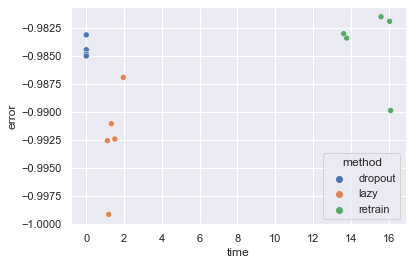

In [84]:
x1 = df[df.variable=='X4']
x1['true_vi'] = (1.5**2)*(1-.75**2)

x1['error'] = x1.vi - x1.true_vi

sns.scatterplot(x='time', y='error', hue='method', data=x1)

<AxesSubplot:xlabel='variable', ylabel='vi'>

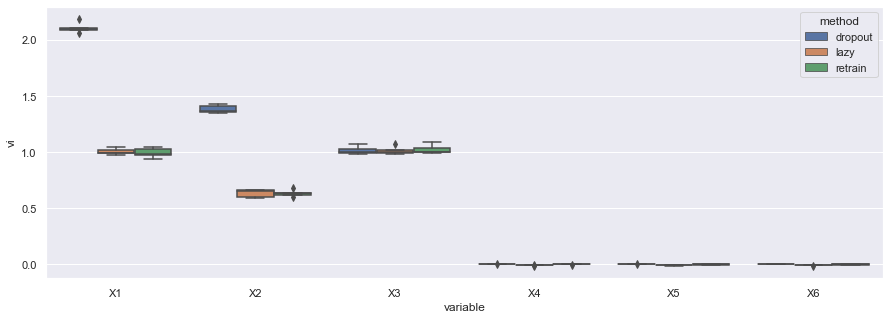

In [2]:
df = pd.read_csv('../results/linear_width12_corr0.75_tol0.001_iter5.csv')
plt.figure(figsize=(15,5))
sns.boxplot(x='variable', y='vi', hue='method', data=df[df.variable!='all'])

In [6]:
df.copy().assign(count=df.vi)

,variable,method,time,vi,train_loss,test_loss,count
0,all,full model,19.857838,0.000000,0.022911,0.022710,0.000000
1,X1,dropout,0.000000,2.056605,2.182163,2.079314,2.056605
2,X1,lazy,1.411662,0.993361,1.068547,1.016071,0.993361
3,X1,retrain,14.679974,0.936842,1.005425,0.959551,0.936842
4,X2,dropout,0.000000,1.351045,1.468168,1.373755,1.351045
...,...,...,...,...,...,...,...
90,X5,lazy,1.134069,-0.011781,0.017615,0.019379,-0.011781
91,X5,retrain,16.395909,-0.005522,0.021981,0.025637,-0.005522
92,X6,dropout,0.000000,0.001122,0.030725,0.032281,0.001122
93,X6,lazy,1.121965,-0.014583,0.016422,0.016577,-0.014583


<AxesSubplot:xlabel='lam', ylabel='mse'>

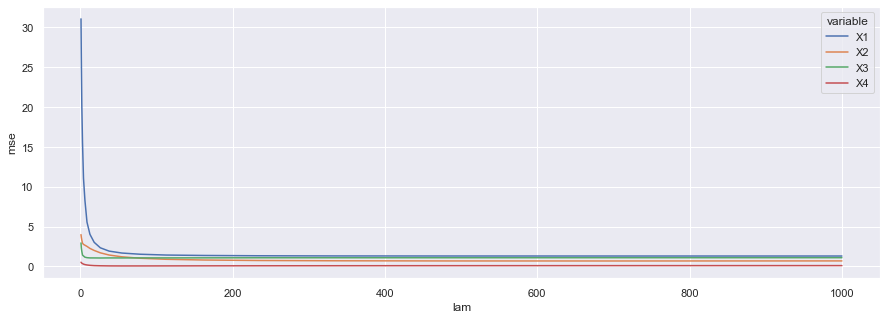

In [68]:
cv = pd.read_csv('../results/cv/linear_width12_corr0.75_sigma0.1_ix0|1|2|3_iter1_lamax3_nlam20.csv')
cv_grp = cv.groupby(['variable', 'lam', 'iter']).mean().reset_index()

plt.figure(figsize=(15,5))
sns.lineplot(x='lam', y='mse', hue='variable', data=cv_grp[(cv_grp.iter==0)])

In [69]:
cv_grp[(cv_grp.iter==0)].sort_values('mse').drop_duplicates('variable')

,variable,lam,iter,mse
71,X4,54.555948,0,0.064171
38,X2,695.192796,0,0.686635
49,X3,26.366509,0,1.061647
18,X1,695.192796,0,1.308817


<AxesSubplot:xlabel='variable', ylabel='time'>

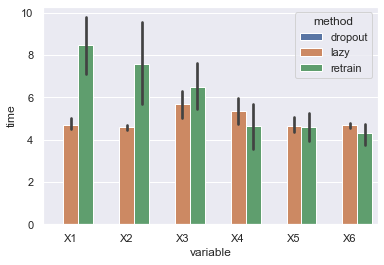

In [9]:
sns.barplot(x='variable', y='time', hue='method', data=df[df.variable!='all'])

<AxesSubplot:xlabel='variable', ylabel='vi'>

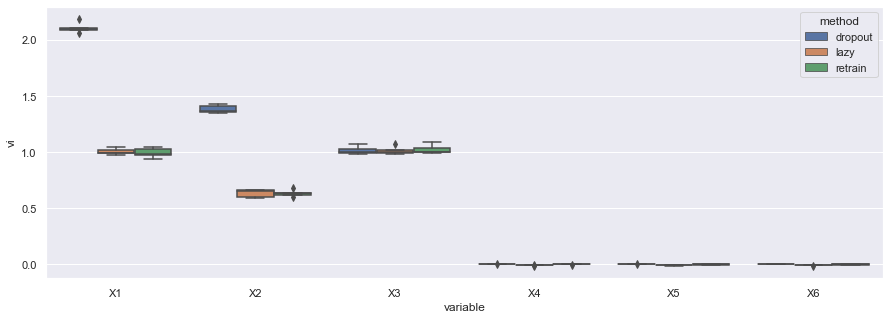

In [118]:
df = pd.read_csv('../results/linear_width12_corr0.75_tol0.001_iter5.csv')
plt.figure(figsize=(15,5))
sns.boxplot(x='variable', y='vi', hue='method', data=df[df.variable!='all'])

<AxesSubplot:xlabel='variable', ylabel='vi'>

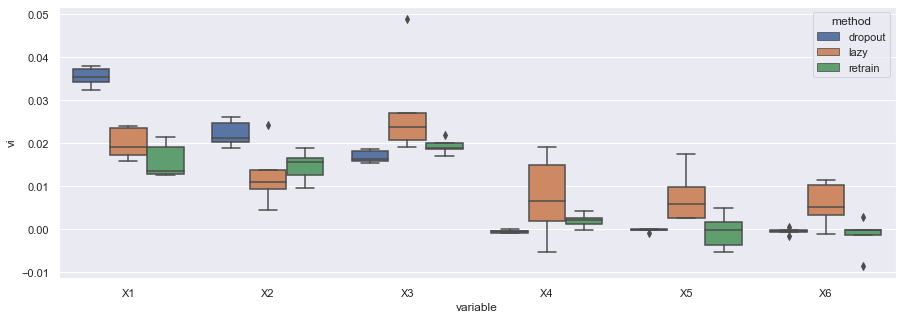

In [123]:
df = pd.read_csv('../results/logistic_width12_corr0.75_tol0.001_iter5.csv')
plt.figure(figsize=(15,5))
sns.boxplot(x='variable', y='vi', hue='method', data=df[df.variable!='all'])

<AxesSubplot:xlabel='variable', ylabel='vi'>

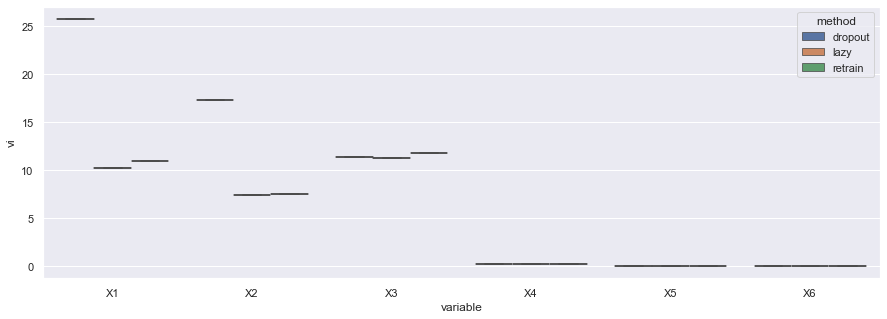

In [125]:
df = pd.read_csv('../results/2lnn_width100_corr0.75_ix0|1|2|3|4|5_iter1.csv')
plt.figure(figsize=(15,5))
sns.boxplot(x='variable', y='vi', hue='method', data=df[df.variable!='all'])

<AxesSubplot:xlabel='variable', ylabel='vi'>

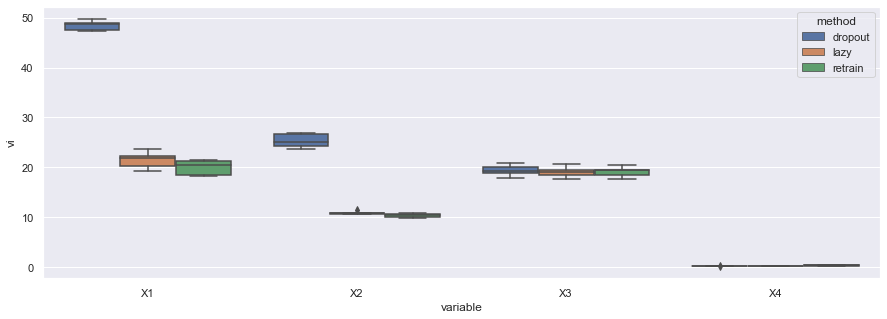

In [126]:
df = pd.read_csv('../results/2lnn_width100_corr0.75_ix0|1|2|3_iter5.csv')
plt.figure(figsize=(15,5))
sns.boxplot(x='variable', y='vi', hue='method', data=df[df.variable!='all'])

<AxesSubplot:xlabel='variable', ylabel='time'>

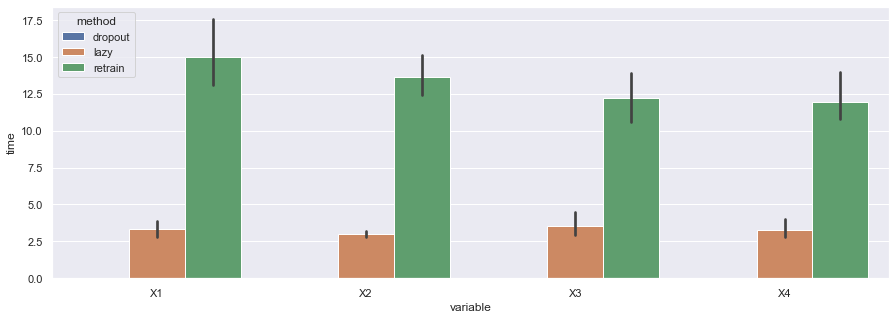

In [127]:
plt.figure(figsize=(15,5))
sns.barplot(x='variable', y='time', hue='method', data=df[df.variable!='all'])

In [113]:
1.5**2*(1 - .75**2)

0.984375

In [8]:
cv = pd.read_csv('../results/cv/linear_width100_corr0.75_tol0.001_iter5.csv')

<AxesSubplot:xlabel='lam', ylabel='mse'>

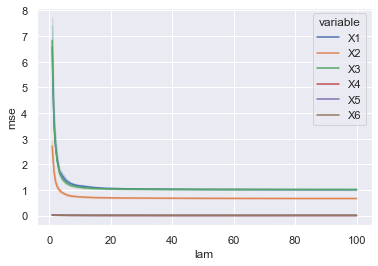

In [9]:
sns.lineplot(x='lam', y='mse', hue='variable', data=cv)

<AxesSubplot:xlabel='lam', ylabel='log_mse'>

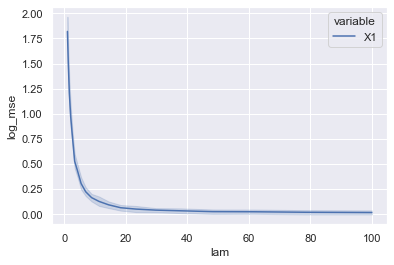

In [14]:
cv['log_mse'] = np.log(cv.mse)

sns.lineplot(x='lam', y='log_mse', hue='variable', data=cv[cv.variable=='X1'])

<AxesSubplot:xlabel='variable', ylabel='lam'>

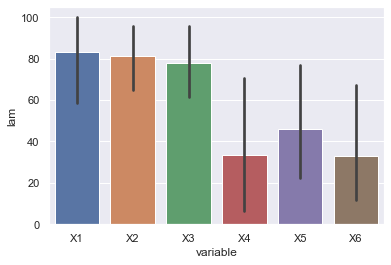

In [65]:
sns.barplot(x='variable', y='lam', 
            data=cv.groupby(['lam', 'iter', 'variable']
                           ).mse.mean().reset_index().sort_values(['variable', 'mse'], ascending=['True', 'False']).drop_duplicates(['iter', 'variable']))

In [87]:
cv = pd.read_csv('../results/cv/logistic_width12_corr0.75_tol0.001_iter5.csv')

<AxesSubplot:xlabel='lam', ylabel='mse'>

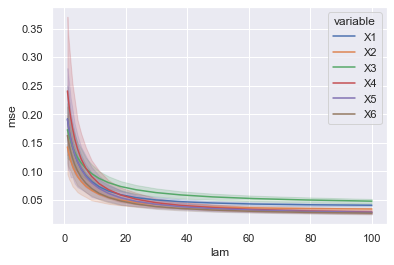

<AxesSubplot:xlabel='lam', ylabel='mse'>

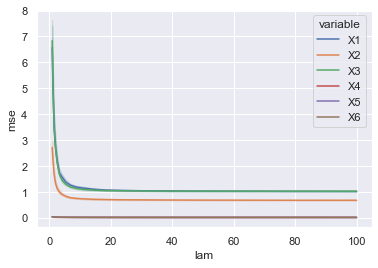

In [63]:
sns.lineplot(x='lam', y='mse', hue='variable', data=cv)

<AxesSubplot:xlabel='lam', ylabel='mse'>

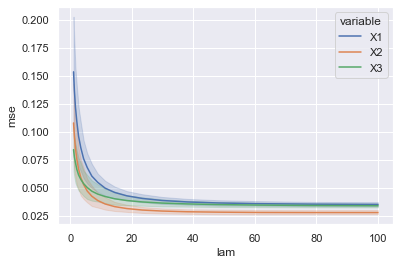

In [80]:
sns.lineplot(x='lam', y='mse', hue='variable', 
             data=cv[cv.variable.isin(['X1', 'X2', 'X3'])].groupby(
                 ['lam', 'iter', 'variable']).mse.mean().reset_index())

<AxesSubplot:xlabel='variable', ylabel='vi'>

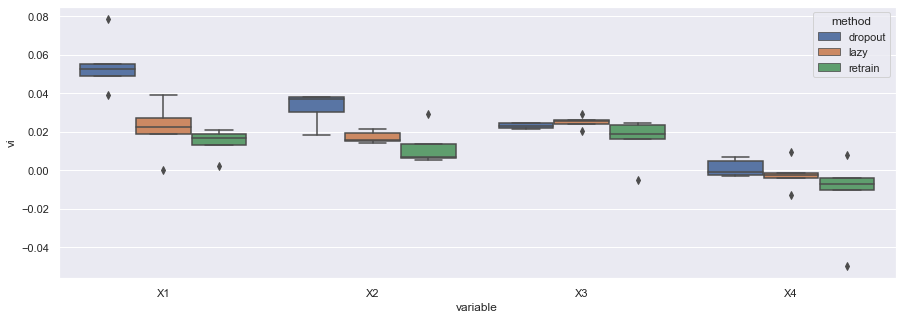

In [34]:
df = pd.read_csv('../results/logistic_width12_corr0.75_sigma0.001_ix0|1|2|3_iter5_lamax3.csv')
plt.figure(figsize=(15,5))
sns.boxplot(x='variable', y='vi', hue='method', data=df[df.variable!='all'])

In [35]:
cv = pd.read_csv('../results/cv/logistic_width12_corr0.75_sigma0.001_ix0|1|2|3_iter5_lamax3.csv')

In [37]:
cv.groupby()

,lam,mse,variable,iter
0,1.0,0.257793,X1,0
1,1.0,0.234145,X1,0
2,1.0,0.313671,X1,0
3,1.0,0.314762,X1,0
4,1.0,0.232930,X1,0
...,...,...,...,...
995,1000.0,0.096698,X4,4
996,1000.0,0.100981,X4,4
997,1000.0,0.100743,X4,4
998,1000.0,0.106185,X4,4


<AxesSubplot:xlabel='lam', ylabel='mse'>

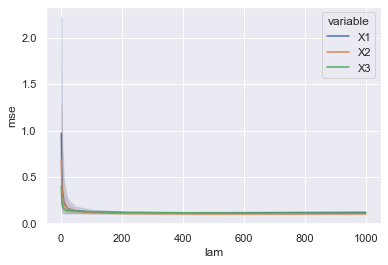

In [36]:
sns.lineplot(x='lam', y='mse', hue='variable', 
             data=cv[cv.variable.isin(['X1', 'X2', 'X3'])].groupby(
                 ['lam', 'iter', 'variable']).mse.mean().reset_index())

In [31]:

X, y =  generate_logistic_data([15, 12, 10, 0, 0, 0], sigma=0.01, N=5000, seed=1, corr=0.5)

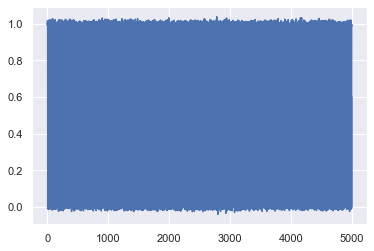

In [32]:
plt.plot(y)

In [28]:
def generate_logistic_data(beta, sigma=0.1, N=5000, seed=1, corr=0.5):
    random.seed(seed)
    cov = [[1, corr], [corr, 1]]
    beta = np.array(beta, dtype=float)
    p = beta.shape[0]
    X = np.random.normal(0, .1, size=(N, p))
    X[:, np.array([0, 1])] = np.random.multivariate_normal([0, 0], cov, size=N)
    normal_noise = np.random.normal(0, sigma, size=N)
    EY = np.exp(X@beta)/(1 + np.exp(X@beta))
    Y = EY + normal_noise

    X = torch.tensor(X, dtype=torch.float32)
    Y = torch.tensor(Y, dtype=torch.float32).view(-1, 1)
    return X, Y


In [ ]:
df = 